# Questions
## General
- how many unique orders?
- how many unique customers?
- what are the segments?
- what is the date range of the orders?
- how many unique categories, sub_categories, products?

## Shipping
- frequency count of ship mode
- how long does it take for an order to ship

## Customer details
- avg number of orders
- avg order value per customer
- customer churn (more than a year since last order)

## Sales details
- Total sales by region
- Sales by category
- Sales by sub-category
- average sales amount by month
- total sales by year
- percent change in sales by year
- what are the top 5 selling items over all?
- what are the top 5 selling items per month?

What are the forecasted sales? (next notebook)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('data/superstore_clean.csv', parse_dates=['order_date', 'ship_date'], dtype={'postal_code':'string'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9800 non-null   string        
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub_category   9800 n

In [4]:
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


## General
- how many unique orders?
- how many unique customers?
- what are the segments?
- what is the date range of the orders?
- how many unique categories, sub_categories, products?

In [5]:
# how many unique orders?
print("There are {} unique orders in this dataset.".format(df.order_id.nunique()))

There are 4922 unique orders in this dataset.


In [6]:
# how many unique customers?
print("There are {} unique customers in this dataset.".format(df.customer_id.nunique()))

There are 793 unique customers in this dataset.


In [7]:
#how many items were ordered? each line in the dataset is one item
print("{} items were ordered.".format(len(df)))

9800 items were ordered.


In [8]:
# what are the segments and how many are in each
# get users and segment, drop duplicates and then do value_counts and 
segs = df[['order_id', 'segment']].copy()
segs.drop_duplicates(inplace=True)
segs.head()

,order_id,segment
0,CA-2017-152156,Consumer
2,CA-2017-138688,Corporate
3,US-2016-108966,Consumer
5,CA-2015-115812,Consumer
12,CA-2018-114412,Consumer


In [9]:
segs.segment.value_counts(normalize=True)

segment
Consumer       0.515441
Corporate      0.302926
Home Office    0.181633
Name: proportion, dtype: float64

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


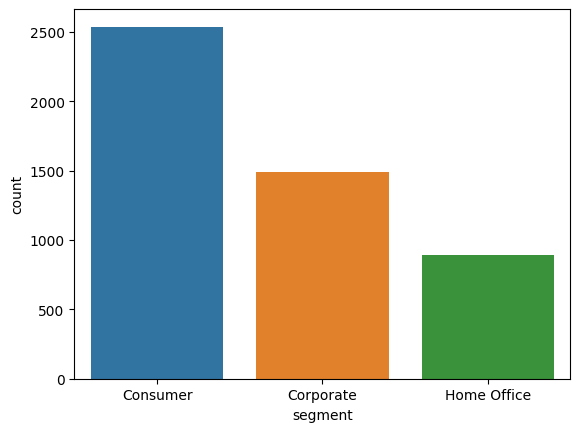

In [10]:
sns.countplot(x=segs['segment'])
plt.show()

Half of the orders were by the `Consumer` segment, `Corporate` accounts for 30% and and `Home Office` 18%.

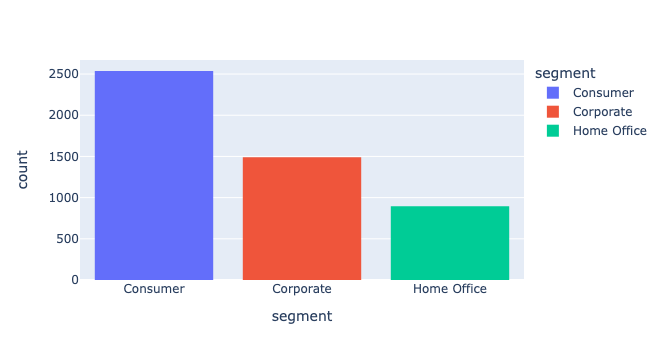

In [26]:
fig = px.histogram(segs, x='segment', color = 'segment')
fig.show()

In [12]:
#what is the date range of the orders?
print('The earliest order was made on {}.'.format(df.order_date.min()))

The earliest order was made on 2015-01-03 00:00:00.


In [13]:
print('The last order was made on {}.'.format(df.order_date.max()))

The last order was made on 2018-12-30 00:00:00.


In [14]:
#how many unique categories, sub-categories and products are there in the dataset?
for c in list(df['category'].unique()):
    df_temp = df[df['category'] == c]
    print(c)
    print(df_temp['sub_category'].unique())

Furniture
['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Office Supplies
['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']
Technology
['Phones' 'Accessories' 'Machines' 'Copiers']


In [15]:
print('There are {} unique products in the dataset.'.format(df.product_id.nunique()))

There are 1861 unique products in the dataset.


/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



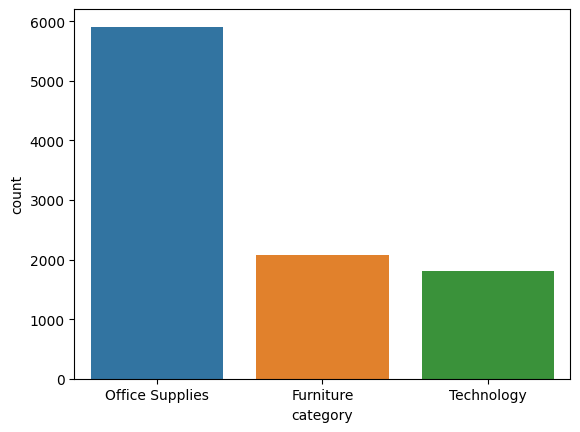

In [16]:
sns.countplot(x=df['category'], order=df['category'].value_counts(dropna=False).index)
plt.show()

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



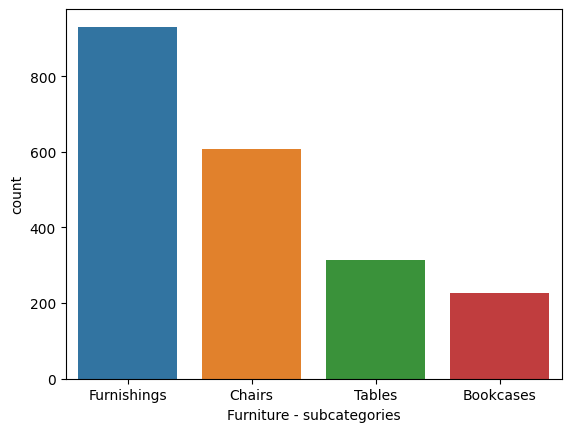

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



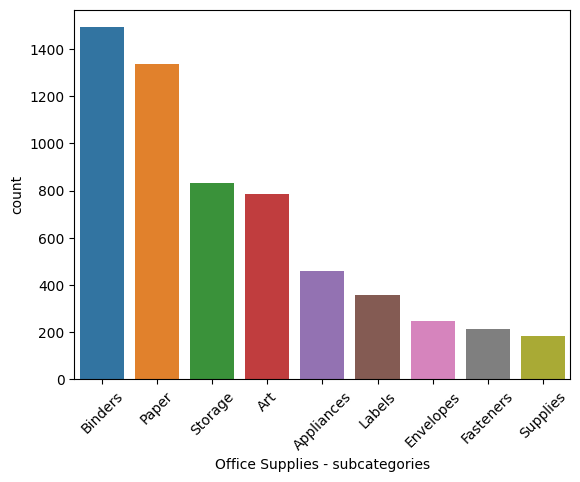

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



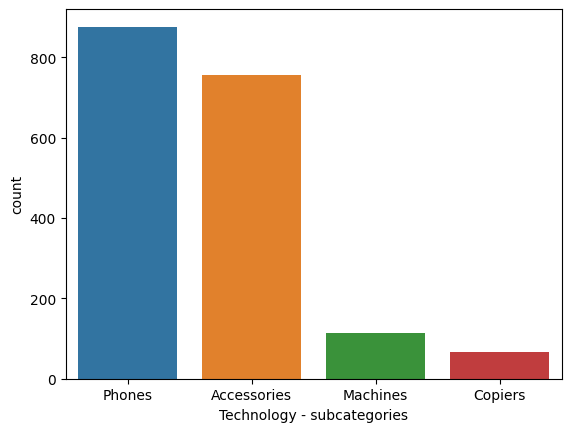

In [17]:
for c in list(df['category'].unique()):
    df_temp = df[df['category'] == c]
    ax = sns.countplot(x=df_temp['sub_category'], order=df_temp['sub_category'].value_counts(dropna=False).index)
    ax.set_xlabel('{} - subcategories'.format(c))
    if df_temp['sub_category'].nunique()>5:
        plt.xticks(rotation = 45)
    plt.show()

## Shipping
- frequency count of ship mode
- how long does it take for an order to ship

In [18]:
# what are the ship modes and how many are in each
sh_mode = df[['order_id', 'ship_mode']].copy()
sh_mode.drop_duplicates(inplace=True)
sh_mode.head()

,order_id,ship_mode
0,CA-2017-152156,Second Class
2,CA-2017-138688,Second Class
3,US-2016-108966,Standard Class
5,CA-2015-115812,Standard Class
12,CA-2018-114412,Standard Class


In [19]:
sh_mode.ship_mode.value_counts(normalize=True)

ship_mode
Standard Class    0.598334
Second Class      0.191792
First Class       0.156847
Same Day          0.053027
Name: proportion, dtype: float64

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



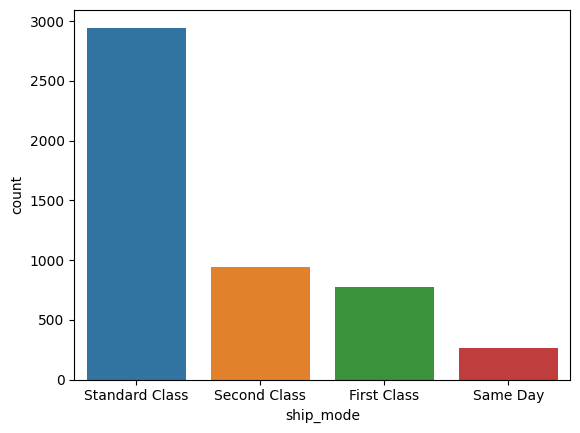

In [20]:
sns.countplot(sh_mode, x='ship_mode', order=sh_mode.ship_mode.value_counts(dropna=False).index)
plt.show()

In [21]:
#how long does it take for an order to ship
ship_times = df[['order_id', 'order_date', 'ship_date']].copy()
ship_times.drop_duplicates(inplace=True)
ship_times.head()

,order_id,order_date,ship_date
0,CA-2017-152156,2017-11-08,2017-11-11
2,CA-2017-138688,2017-06-12,2017-06-16
3,US-2016-108966,2016-10-11,2016-10-18
5,CA-2015-115812,2015-06-09,2015-06-14
12,CA-2018-114412,2018-04-15,2018-04-20


In [22]:
ship_times['time_to_ship']=(ship_times['ship_date']-ship_times['order_date']).dt.days
ship_times.head()

,order_id,order_date,ship_date,time_to_ship
0,CA-2017-152156,2017-11-08,2017-11-11,3
2,CA-2017-138688,2017-06-12,2017-06-16,4
3,US-2016-108966,2016-10-11,2016-10-18,7
5,CA-2015-115812,2015-06-09,2015-06-14,5
12,CA-2018-114412,2018-04-15,2018-04-20,5


In [23]:
ship_times.time_to_ship.value_counts()

time_to_ship
4    1378
5    1071
2     661
6     584
3     497
7     303
0     249
1     179
Name: count, dtype: int64

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/deborahhaar/Dropbox/data_projects/superstore/superstore_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



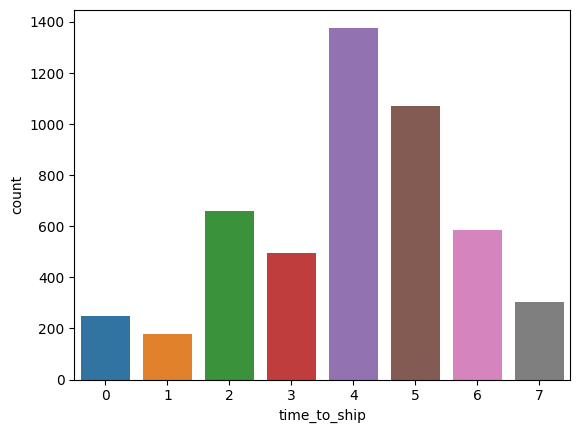

In [24]:
sns.countplot(ship_times, x='time_to_ship')
plt.show()

## Customer details
- avg number of orders
- avg order value per customer
- customer churn (more than a year since last order)

## Sales details
- Total sales by region
- Sales by category
- Sales by sub-category
- average sales amount by month
- total sales by year
- percent change in sales by year
- what are the top 5 selling items over all?
- what are the top 5 selling items per month?